# Exploratory Visualization on Ford GoBike Data
## by Faisal Alqahtani

## Investigation Overview

> In this invetigation, I wanted to look at the characteristics of bikes that could be used to predict the trip duration. The main foucs was on four features: duration_sec, user_type, member_birth_year and member_gender.
## Dataset Overview

> The dataset consisted of duration and attributes of approximately 17,4952 bike. The attributes included  the four features mentioned above, as well as additional features such as start_time, end_time, bike_id, start_station_name and end_station_name.  

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

# suppress warnings from final output
import warnings
warnings.simplefilter("ignore")

In [2]:
# load in the dataset into a pandas dataframe
dataset = pd.read_csv('201902-fordgobike-tripdata.csv')

In [3]:
df = dataset.copy()
print(df.shape)
print(df.dtypes)
print(df.head(10))

(183412, 16)
duration_sec                 int64
start_time                  object
end_time                    object
start_station_id           float64
start_station_name          object
start_station_latitude     float64
start_station_longitude    float64
end_station_id             float64
end_station_name            object
end_station_latitude       float64
end_station_longitude      float64
bike_id                      int64
user_type                   object
member_birth_year          float64
member_gender               object
bike_share_for_all_trip     object
dtype: object
   duration_sec                start_time                  end_time  \
0         52185  2019-02-28 17:32:10.1450  2019-03-01 08:01:55.9750   
1         42521  2019-02-28 18:53:21.7890  2019-03-01 06:42:03.0560   
2         61854  2019-02-28 12:13:13.2180  2019-03-01 05:24:08.1460   
3         36490  2019-02-28 17:54:26.0100  2019-03-01 04:02:36.8420   
4          1585  2019-02-28 23:54:18.5490  2019-03-01 00:2

In [4]:
# changing data type of start_time and end_time to datetime.
df.start_time = pd.to_datetime(df.start_time)
df.end_time = pd.to_datetime(df.end_time)
# Convert time variables to morning, afternoon, night of a day
df['start_hour'] = df['start_time'].apply(lambda time: time.hour)
df['period_day'] = 'morning'
df['period_day'][(df['start_hour'] >= 12) & (df['start_hour'] <= 17)] = 'afternoon'
df['period_day'][(df['start_hour'] >= 18) & (df['start_hour'] <= 23)] = 'night'
# extract start time weekdays
df['start_time_weekday']=df['start_time'].dt.strftime('%a')
# drop the null and duplicated values
df = df.dropna()
df = df.drop_duplicates()
# the year type is float which is invalid we convert it int
df['member_birth_year'] = df['member_birth_year'].astype('int') 
df

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip,start_hour,period_day,start_time_weekday
0,52185,2019-02-28 17:32:10.145,2019-03-01 08:01:55.975,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,13.0,Commercial St at Montgomery St,37.794231,-122.402923,4902,Customer,1984,Male,No,17,afternoon,Thu
2,61854,2019-02-28 12:13:13.218,2019-03-01 05:24:08.146,86.0,Market St at Dolores St,37.769305,-122.426826,3.0,Powell St BART Station (Market St at 4th St),37.786375,-122.404904,5905,Customer,1972,Male,No,12,afternoon,Thu
3,36490,2019-02-28 17:54:26.010,2019-03-01 04:02:36.842,375.0,Grove St at Masonic Ave,37.774836,-122.446546,70.0,Central Ave at Fell St,37.773311,-122.444293,6638,Subscriber,1989,Other,No,17,afternoon,Thu
4,1585,2019-02-28 23:54:18.549,2019-03-01 00:20:44.074,7.0,Frank H Ogawa Plaza,37.804562,-122.271738,222.0,10th Ave at E 15th St,37.792714,-122.248780,4898,Subscriber,1974,Male,Yes,23,night,Thu
5,1793,2019-02-28 23:49:58.632,2019-03-01 00:19:51.760,93.0,4th St at Mission Bay Blvd S,37.770407,-122.391198,323.0,Broadway at Kearny,37.798014,-122.405950,5200,Subscriber,1959,Male,No,23,night,Thu
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
183407,480,2019-02-01 00:04:49.724,2019-02-01 00:12:50.034,27.0,Beale St at Harrison St,37.788059,-122.391865,324.0,Union Square (Powell St at Post St),37.788300,-122.408531,4832,Subscriber,1996,Male,No,0,morning,Fri
183408,313,2019-02-01 00:05:34.744,2019-02-01 00:10:48.502,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,66.0,3rd St at Townsend St,37.778742,-122.392741,4960,Subscriber,1984,Male,No,0,morning,Fri
183409,141,2019-02-01 00:06:05.549,2019-02-01 00:08:27.220,278.0,The Alameda at Bush St,37.331932,-121.904888,277.0,Morrison Ave at Julian St,37.333658,-121.908586,3824,Subscriber,1990,Male,Yes,0,morning,Fri
183410,139,2019-02-01 00:05:34.360,2019-02-01 00:07:54.287,220.0,San Pablo Ave at MLK Jr Way,37.811351,-122.273422,216.0,San Pablo Ave at 27th St,37.817827,-122.275698,5095,Subscriber,1988,Male,No,0,morning,Fri


In [5]:
print(df.describe())

        duration_sec  start_station_id  start_station_latitude  \
count  174952.000000     174952.000000           174952.000000   
mean      704.002744        139.002126               37.771220   
std      1642.204905        111.648819                0.100391   
min        61.000000          3.000000               37.317298   
25%       323.000000         47.000000               37.770407   
50%       510.000000        104.000000               37.780760   
75%       789.000000        239.000000               37.797320   
max     84548.000000        398.000000               37.880222   

       start_station_longitude  end_station_id  end_station_latitude  \
count            174952.000000   174952.000000         174952.000000   
mean               -122.351760      136.604486             37.771414   
std                   0.117732      111.335635              0.100295   
min                -122.453704        3.000000             37.317298   
25%                -122.411901       44.00000

## Distribution of the member gender of the subscribers and customers

> I'll start by looking at the distribution of the member gender of the Subscribers and non-subscriber. The dataset takes a large quantatiy of male subscribers and customers are than other and females, whears the number of males are above 120,000 and females are 40,000.

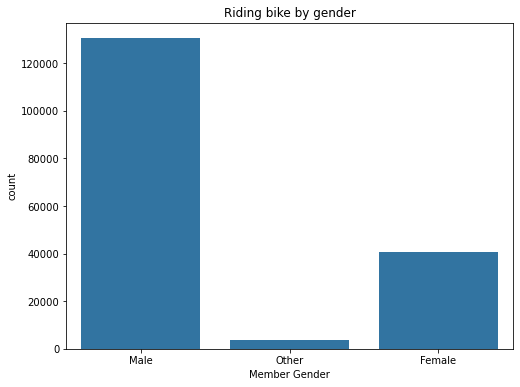

In [6]:
plt.figure(figsize = [8,6])
sb.countplot(data = df, x = 'member_gender', color = sb.color_palette()[0])
plt.title('Riding bike by gender')
plt.xlabel('Member Gender');

## Distribution of the trip duration according to the member gender

> We see that the trip duration depends on the gender and the user type of the customers and subscribers where females ride the bikes longer than males. Also regardless of gender, the customers ride the bikes longer than the subscribers.

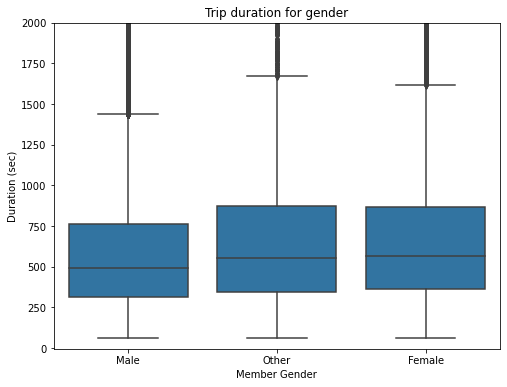

In [7]:
plt.figure(figsize = [8,6])
sb.boxplot(data = df, x = 'member_gender', y = 'duration_sec', color = sb.color_palette()[0])
plt.ylim([-5, 2000])
plt.title('Trip duration for gender')
plt.xlabel('Member Gender')
plt.ylabel('Duration (sec)');

## Distribution of the number of trips in terms of weekdays and day period

- The number of trips is higher on the weekdays than weekends.
- The 'San Francisco Caltrain Station 2 (Townsend St at 4th St)' station has the highest trips in the morning & night.
- The 'Market St at 10th St' station has the highest trips in the afternoon.

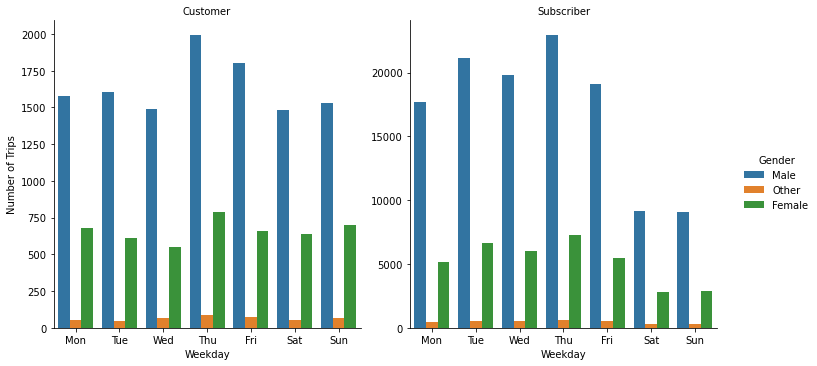

In [8]:

weekdays = ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun']
g = sb.catplot(data=df, x='start_time_weekday', col="user_type", hue='member_gender', kind='count', sharey = False,
               order = weekdays)
g._legend.set_title('Gender')
g.set_titles("{col_name}")
g.set_axis_labels("Weekday", "Number of Trips");

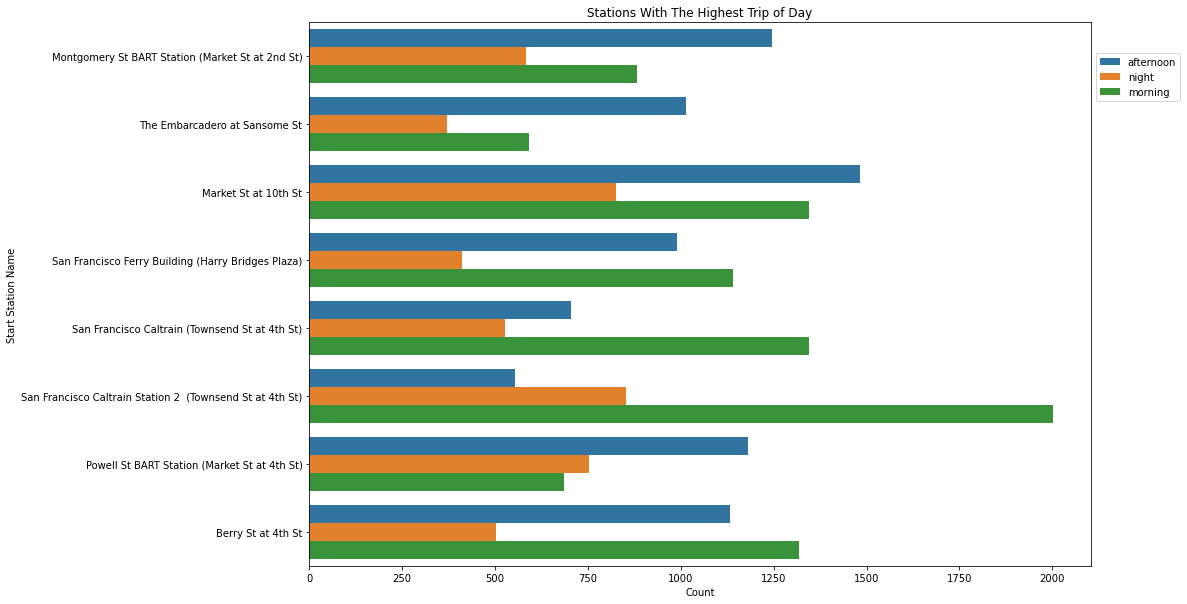

In [9]:
stations = ['San Francisco Ferry Building (Harry Bridges Plaza)','The Embarcadero at Sansome St','San Francisco Caltrain (Townsend St at 4th St)','San Francisco Caltrain Station 2  (Townsend St at 4th St)','Market St at 10th St','Montgomery St BART Station (Market St at 2nd St)','Berry St at 4th St','Powell St BART Station (Market St at 4th St)']
df = df.loc[df['start_station_name'].isin(stations)]

plt.figure(figsize=(14,10))
sb.countplot(data=df, y='start_station_name', hue='period_day')
plt.legend(loc='center left', bbox_to_anchor=(1,0.9))
plt.title('Stations With The Highest Trip of Day')
plt.xlabel('Count')
plt.ylabel('Start Station Name');